# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** LUTHFI DELVIAN
- **Email:** luthfidelvian@gmail.com
- **ID Dicoding:** luthpiw

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
2. Apakah hari kerja (working day) mempengaruhi jumlah penyewaan sepeda harian ?
3. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
4. Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda di hari non-libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analysis-Data-Project/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analysis-Data-Project/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

---


Dari hasil output di atas, kita dapat melihat Hour.csv dan day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv:

- instant: Nomor urut baris.
- dteday: Tanggal data diambil.
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
- weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total penyewaan sepeda.

### Assessing Data

Menilai data `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.duplicated().sum()

0

Menilai data `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.duplicated().sum()

0

**Insight:**
- data pada `day_df` dan `hour_df` sudah lengkap
- tidak ada data duplikat pada kedua dataset
- hanya ada keanehan pada tipe data "dteday" pada kedua dataset yang seharusnya berbentuk "datetime" bukan "object"

### Cleaning Data

#### **Membersihkan tabel `day_df`**

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### **Membersihkan tabel `hour_df`**

In [10]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Menggabungkan dataset jika nanti dibutuhkan**



In [11]:
merged_data = hour_df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()
day_df = day_df.merge(merged_data, on='dteday', suffixes=('', '_total'))

**Insight:**
- tipe data pada kolom "dteday" pada kedua dataset sudah diubah ke tipe data "datetime" yang asalnya "object"
- dataset hour_df dan day_df berhasil digabungkan

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_total
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1937.211452


**Insight:**
- Kolom dteday telah berhasil diubah menjadi tipe data datetime, dan data tersebar antara 1 Januari 2011 hingga 31 Desember 2012.
- Rata-rata jumlah sepeda yang disewa (cnt) adalah sekitar 180 sepeda per jam, dengan nilai minimum 1 dan maksimum 733 sepeda.
- Kolom temp (temperatur berskala 0 hingga 1) memiliki nilai rata-rata 0.49, sedangkan kolom hum (kelembaban) memiliki rata-rata 0.63.
- Jumlah pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna tidak terdaftar (casual), dengan rata-rata 145 pengguna terdaftar dan 34 pengguna tidak terdaftar per jam.
- Distribusi data untuk variabel lain:
  - Season: Nilai rata-rata 2.49, menunjukkan bahwa sebagian besar data berasal dari musim kedua hingga ketiga (Spring hingga Summer).
  - Weathersit: Nilai rata-rata 1.42, yang berarti cuaca umumnya adalah kondisi baik atau cukup baik.
  - Windspeed: Rata-rata nilai kecepatan angin adalah 0.19, dengan nilai tertinggi 0.85.
- Dataset ini mencakup semua informasi cuaca, waktu, dan kondisi operasional yang relevan dengan analisis jumlah penyewaan sepeda.

In [29]:
seasonal_stats = hour_df.groupby('season')['cnt'].agg(['mean', 'median', 'std']).reset_index()
seasonal_stats['season'] = seasonal_stats['season'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Rain + Snow',
    4: 'Heavy Rain + Fog'
})
print("\nStatistik Penyewaan Sepeda per Musim:")
print(seasonal_stats)


Statistik Penyewaan Sepeda per Musim:
   season        mean  median         std
0       1  111.114569    76.0  119.224010
1       2  208.344069   165.0  188.362473
2       3  236.016237   199.0  197.711630
3       4  198.868856   155.5  182.967972


In [22]:
workingday_counts = hour_df.groupby('workingday')['cnt'].mean().reset_index()
workingday_counts['workingday'] = workingday_counts['workingday'].map({0: 'Non-Hari Kerja', 1: 'Hari Kerja'})

print("\nRata-rata Penyewaan Sepeda pada Hari Kerja vs Non-Hari Kerja:")
print(workingday_counts)


Rata-rata Penyewaan Sepeda pada Hari Kerja vs Non-Hari Kerja:
       workingday         cnt
0  Non-Hari Kerja  181.405332
1      Hari Kerja  193.207754


In [32]:
weather_counts = hour_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_counts['weathersit'] = weather_counts['weathersit'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

print("\nRata-rata Penyewaan Sepeda per Kondisi Cuaca:")
print(weather_counts)


Rata-rata Penyewaan Sepeda per Kondisi Cuaca:
  weathersit         cnt
0     Spring  204.869272
1     Summer  175.165493
2       Fall  111.579281
3     Winter   74.333333


In [31]:
non_holiday_df = hour_df[hour_df['holiday'] == 0]
# Menghitung korelasi
temp_correlation = non_holiday_df[['temp', 'cnt']].corr().iloc[0, 1]
print(f'\nKorelasi antara suhu dan jumlah penyewaan di hari non-libur: {temp_correlation:.2f}')


Korelasi antara suhu dan jumlah penyewaan di hari non-libur: 0.40


## Visualization & Explanatory Analysis

### Pertanyaan 1:

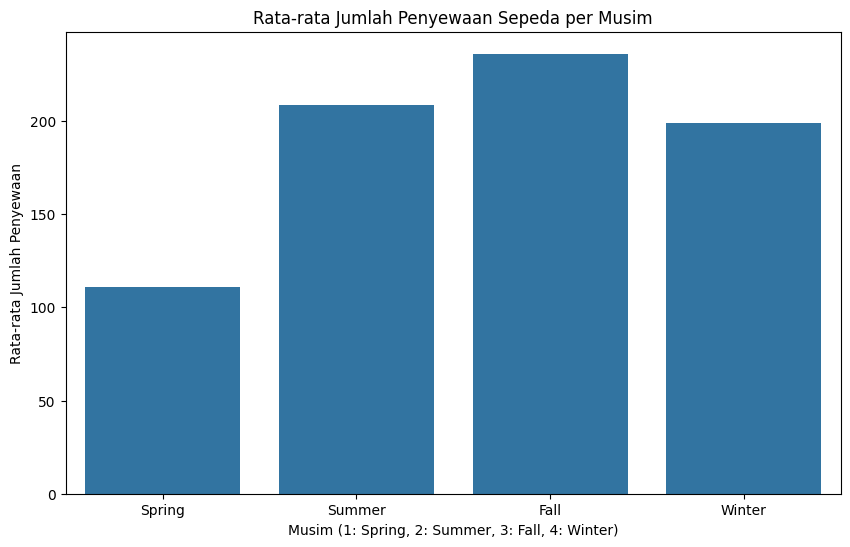

In [14]:
# Rata-rata jumlah penyewaan berdasarkan musim
seasonal_counts = hour_df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_counts)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2:

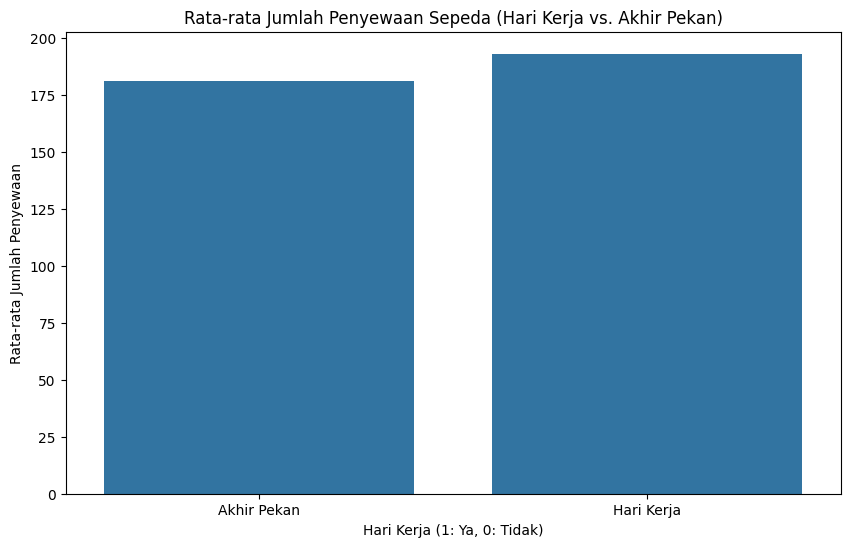

In [15]:
# Rata-rata jumlah penyewaan berdasarkan hari kerja
workingday_counts = hour_df.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_counts)
plt.title('Rata-rata Jumlah Penyewaan Sepeda (Hari Kerja vs. Akhir Pekan)')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.show()

### Pertanyaan 3 :

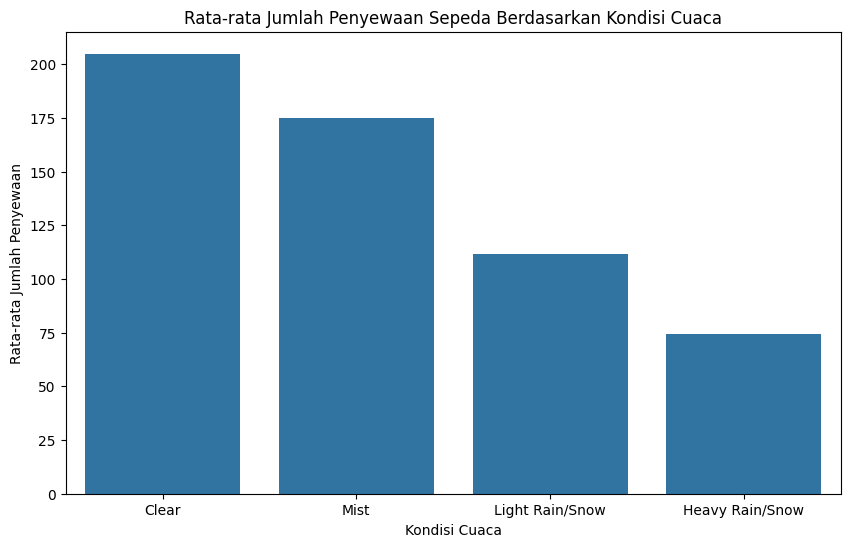

In [16]:
# Rata-rata jumlah penyewaan berdasarkan kondisi cuaca
weather_counts = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_counts)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

### Pertanyaan 4 :

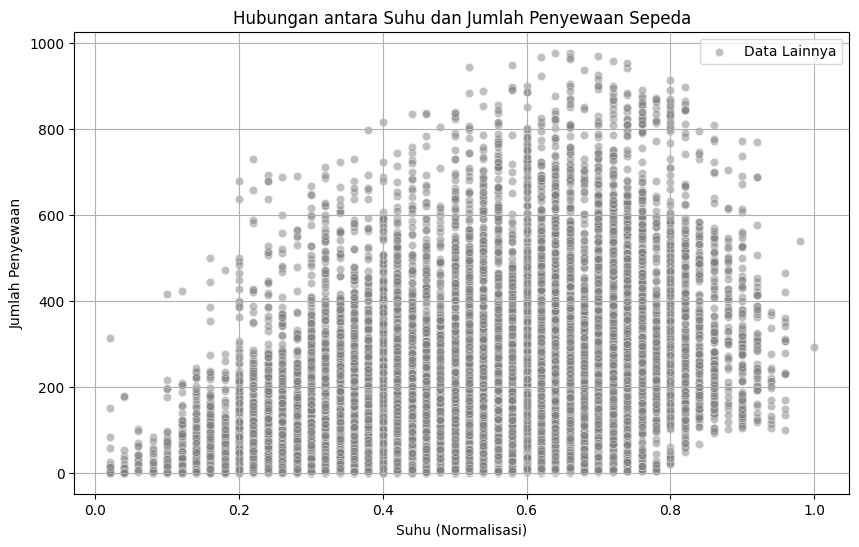

In [17]:
# Visualisasi hubungan suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, color='gray', label='Data Lainnya', alpha=0.5)  # Data lainnya
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dan terendah pada musim semi (Spring).
- Penyewaan cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, mengindikasikan penggunaan untuk perjalanan sehari-hari.
- Kondisi cuaca yang baik (Clear) berhubungan positif dengan jumlah penyewaan, sementara cuaca buruk menurunkan jumlah penyewaan.
- Hubungan positif antara suhu dan penyewaan menunjukkan bahwa semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.

## Analisis Lanjutan (Opsional)

**Tren Penyewaan Tahun Pertama**

---



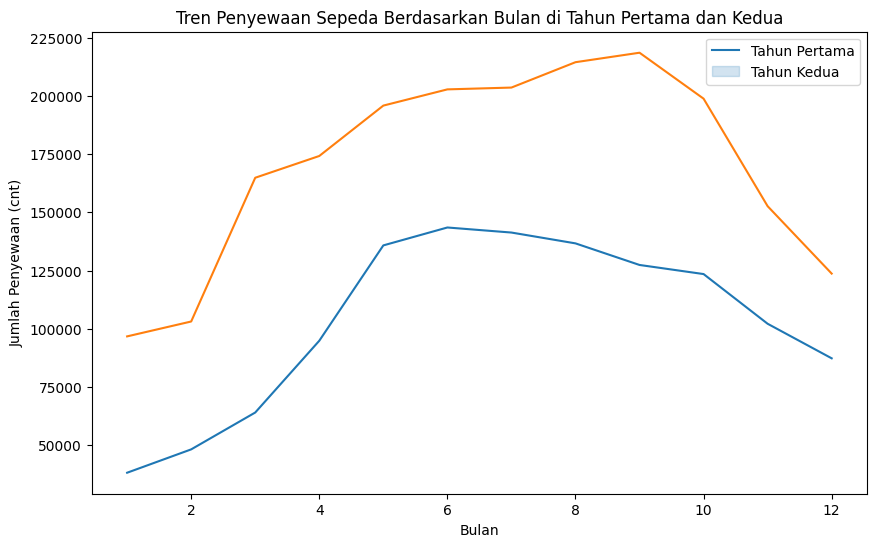

In [18]:
# Membuat data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = hour_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Visualisasi dengan line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr')
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.legend(['Tahun Pertama', 'Tahun Kedua'])
plt.show()

**Clustering tanpa machine learning**

---

Meski clustering umumnya menggunakan algoritma machine learning, kita dapat melakukan analisis segmentasi dengan metode manual, seperti analisis berdasarkan interval.

In [19]:
# Membagi data ke dalam kategori berdasarkan jumlah penyewaan
hour_df['Rental_Category'] = pd.qcut(hour_df['cnt'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Menghitung rata-rata penyewaan untuk setiap kategori
category_summary = hour_df.groupby('Rental_Category')['cnt'].mean().reset_index()

# Menampilkan ringkasan kategori
print(category_summary)

  Rental_Category         cnt
0          Rendah   15.279187
1          Sedang   89.272685
2          Tinggi  205.633372
3   Sangat Tinggi  449.765372


<ipython-input-19-aa9a71afac7f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary = hour_df.groupby('Rental_Category')['cnt'].mean().reset_index()


## Conclusion

- Menariknya, analisis menunjukkan bahwa musim gugur mencatatkan jumlah penyewaan tertinggi, sedangkan musim semi memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa kondisi cuaca dan faktor-faktor musiman lainnya, seperti aktivitas sosial dan sekolah, mungkin berperan dalam peningkatan penggunaan sepeda selama musim gugur.
- Data tetap menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Ini mencerminkan penggunaan sepeda untuk perjalanan sehari-hari, seperti ke kantor atau sekolah.
- Cuaca memiliki dampak signifikan terhadap penyewaan. Hari-hari dengan cuaca cerah (clear) menunjukkan angka penyewaan yang lebih tinggi, sedangkan kondisi hujan atau berkabut berpotensi menurunkan minat pengguna untuk menyewa sepeda.
- Terdapat hubungan positif antara suhu dan jumlah penyewaan. Pengguna lebih cenderung menyewa sepeda pada hari-hari dengan suhu yang lebih hangat, mencerminkan preferensi untuk beraktivitas di luar ruangan.

In [20]:
hour_df.to_csv("all_data.csv", index=False)